# PlotSpectra

Testing the routines for loading mineral data and then generating plots of track-length spectra

In [21]:
from paleo.paleopy_classes import *
import paleo.paleopy as paleopy
from matplotlib import pyplot as plt

from matplotlib.ticker import LogLocator

import matplotlib as mpl
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=16)
#mpl.rcParams.update({'font.size': 16,'font.family':'serif'})

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

import importlib
importlib.reload(paleopy)


<module 'paleo.paleopy' from '/Users/bradkav/Code/paleo_detectors/Notebooks/paleo/paleopy.py'>

#### Code for plotting spectra

In [2]:
def plotSpectrum(mineral):
    
    x_bins = np.logspace(0,3,100)

    plt.figure(figsize=(7,5))

    plt.title(mineral.name)

    plt.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 5), label=r'$5\,\mathrm{GeV}$')
    plt.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 50), label=r'$50\,\mathrm{GeV}$')
    plt.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 500), label=r'$500\,\mathrm{GeV}$')

    plt.loglog(x_bins[:-1], mineral.dRdx_nu(x_bins), linestyle='--',label=r'Neutrinos')

    plt.loglog(x_bins[:-1], mineral.dRdx_neutrons(x_bins), linestyle=':', label='Neutrons')
    
    #Plot the line from Thorium
    x_Th = mineral.xT_Thorium()
    plt.loglog([x_Th, x_Th], [1e-10, mineral.norm_Thorium(T=1e7)], linestyle='-.',label='Thorium')

    plt.legend(fontsize=12)

    ax = plt.gca()
    plt.text(0.05, 0.9, r"$\sigma_p^{\mathrm{SI}}=10^{-45}\,\mathrm{cm}^2$",fontsize=16.0, transform=ax.transAxes)
    
    plt.ylabel("dR/dx [1/nm/kg/Myr]")
    plt.xlabel("x [nm]")
    plt.ylim(1e-4,1e10)
    plt.xlim(1,1000)

    plt.savefig("../plots/" + mineral.name + "_spectra.pdf",bbox_inches="tight")

    plt.show()

### Sinjarite

Mineral name: Sinjarite
    N_nuclei: 4
    Molar mass: 146.9  g/mol
    nucleus 	*	 abun.  *	 (N_p, N_n)
 **************************************************
    Ca		*	0.2722940776038121	*	(20.0, 20.0)
    H		*	0.02722940776038121	*	(1.0, 0.0)
    Cl		*	0.48264125255275697	*	(17.0, 18.45)
    O		*	0.21783526208304968	*	(8.0, 8.0)
Plotting SRIM data for Sinjarite:


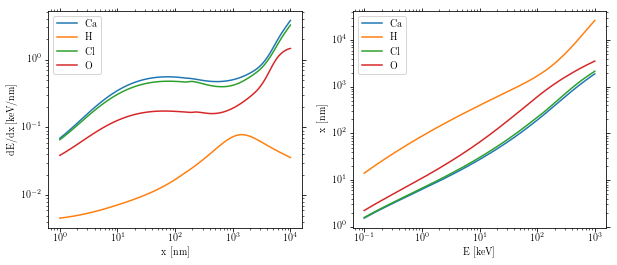

In [3]:
Sinj = Mineral("Sinjarite")
Sinj.showProperties()
Sinj.showSRIM()

 DMutils.py: Loading neutrino flux for the first time...
Loading neutrino fluxes for...
    DSNB
    atm
    hep
    8B
    15O
    17F
    pep
    13N
    pp
    7Be-384
    7Be-861
...done.


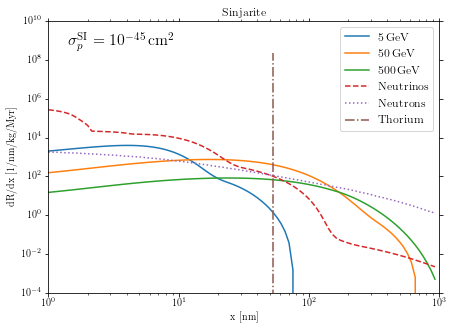

In [4]:
plotSpectrum(Sinj)

### Olivine

Mineral name: Olivine
    N_nuclei: 4
    Molar mass: 153.22  g/mol
    nucleus 	*	 abun.  *	 (N_p, N_n)
 **************************************************
    Mg		*	0.25375277378932254	*	(12.0, 12.3)
    Fe		*	0.14580341991907064	*	(26.0, 29.85)
    Si		*	0.18274376713222817	*	(14.0, 14.0)
    O		*	0.4177000391593787	*	(8.0, 8.0)
Plotting SRIM data for Olivine:


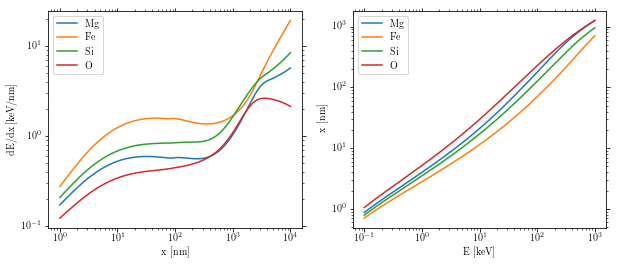

In [5]:
Oliv = Mineral("Olivine")
Oliv.showProperties()
Oliv.showSRIM()

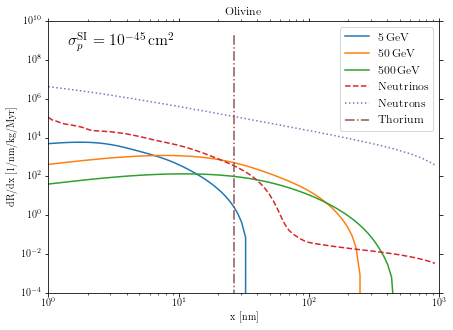

In [6]:
plotSpectrum(Oliv)

### Halite

Mineral name: Halite
    N_nuclei: 2
    Molar mass: 58.45  g/mol
    nucleus 	*	 abun.  *	 (N_p, N_n)
 **************************************************
    Na		*	0.39349871685201027	*	(11.0, 12.0)
    Cl		*	0.6065012831479898	*	(17.0, 18.45)
Plotting SRIM data for Halite:


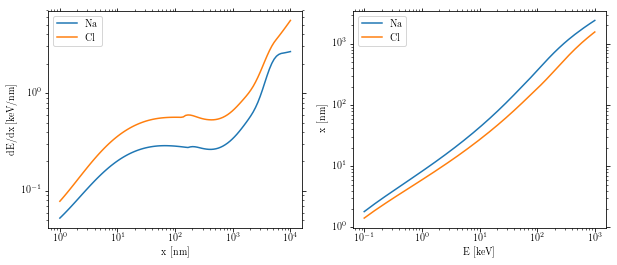

In [7]:
Hal = Mineral("Halite")
Hal.showProperties()
Hal.showSRIM()

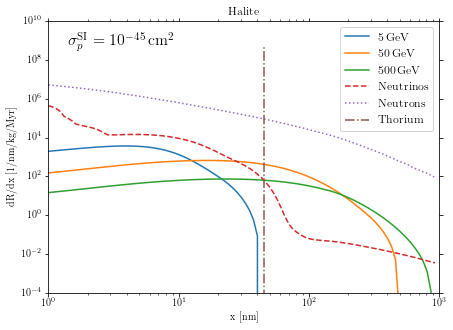

In [8]:
plotSpectrum(Hal)

### Nchwaningite

Mineral name: Nchwaningite
    N_nuclei: 4
    Molar mass: 238.0  g/mol
    nucleus 	*	 abun.  *	 (N_p, N_n)
 **************************************************
    Mn		*	0.46218487394957986	*	(25.0, 30.0)
    Si		*	0.11764705882352941	*	(14.0, 14.0)
    O		*	0.40336134453781514	*	(8.0, 8.0)
    H		*	0.01680672268907563	*	(1.0, 0.0)
Plotting SRIM data for Nchwaningite:


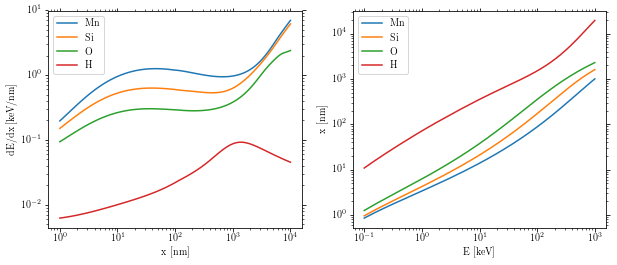

In [9]:
Nchw = Mineral("Nchwaningite")
Nchw.showProperties()
Nchw.showSRIM()

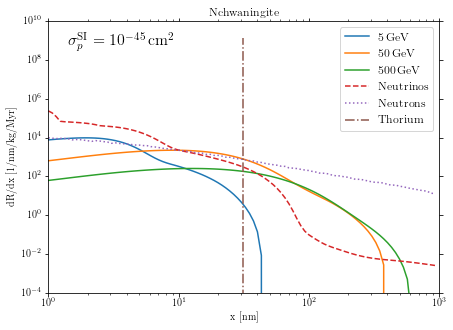

In [10]:
plotSpectrum(Nchw)

------
## Plot binned spectra

In [11]:
dRdx_BG = paleopy.GetBackground(Syl, 15.0)

NameError: name 'Syl' is not defined

In [ ]:
def PlotBinnedSpectra(mineral, sigma, m, dRdx_BG):
    ref_sig = 1e-45

    sig = paleopy.GetSignal(mineral, sigma, m_DM=m, xsec=ref_sig)
    
    plt.figure(figsize=(7,5))

    ax = plt.gca()

    ax.set_xscale("log")
    ax.set_yscale("log")

    BG_list = ['DSNB', 'atm', 'hep', '8B', '15O', '17F', '13N', 'pep','pp','7Be-384','7Be-861', 'SF', 'Th']
    
    #for i in range(len(dRdx_BG)):
    #    ax.step(paleopy.calcBins(sigma/2)[:-1] + sigma/4, dRdx_BG[i], label=BG_list[i])
    
    ax.step(paleopy.calcBins(sigma/2)[:-1] + sigma/4, sig, 'k:',label='DM')

    plt.xlabel("$x_T ~[\mathrm{nm}]$")
    #plt.ylabel("Information Flux [A.U.]")

    plt.title(mineral.name)

    #labtext = r'$\sigma_{x_T} = ' + str(int(sigma_x)) + '\,\mathrm{nm}; \,\,\epsilon = ' + str(int(exposure)) + '\,\mathrm{kg}\,\mathrm{Myr}$'
    #plt.text(0.05, 0.9, labtext, fontsize=16, ha='left',transform=ax.transAxes)

    plt.legend(fontsize=14,loc='lower left')

    plt.xlim(1, 1000)
    #plt.ylim(1e-2, 1e10)

    #outfile = '../plots/InfoFlux_' + mineral.name + '_exp' + str(exposure) + '_sig' + str(sigma_x) + '.pdf'

    #plt.savefig(outfile, bbox_inches="tight")

    plt.show()

In [ ]:
PlotBinnedSpectra(Syl, sigma=15.0, m=1.0, dRdx_BG=dRdx_BG)

----
## Also plot info flux

In [12]:
importlib.reload(paleopy)

<module 'paleo.paleopy' from '/Users/bradkav/Code/paleo_detectors/Notebooks/paleo/paleopy.py'>

In [13]:
def MakeSF(mineral, sigma, exposure):
    systematics = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1e-3, 1e-3]
    dRdx_BG = paleopy.GetBackground(mineral, sigma)
    SF = sf.Swordfish(dRdx_BG, T=systematics, E=np.ones_like(dRdx_BG[0])*exposure)
    return SF

In [14]:
#print("Catching some SwordFish with Zabuyelite...")
#SF_Zab_1nm = MakeSF(Zab, 1.0, 1.0)
#SF_Zab_15nm = MakeSF(Zab, 15.0, 100.0)
#print("...done.")

#print("Catching some SwordFish with Sylvanite...")
#SF_Syl_1nm = MakeSF(Syl, 1.0, 1.0)
#SF_Syl_15nm = MakeSF(Syl, 15.0, 100.0)
#print("...done.")

print("Catching some SwordFish with Sinjarite...")
SF_Sinj_1nm = MakeSF(Sinj, 1.0, 1.0)
SF_Sinj_15nm = MakeSF(Sinj, 15.0, 100.0)
print("...done.")

print("Catching some SwordFish with Olivine...")
SF_Oliv_1nm = MakeSF(Oliv, 1.0, 1.0)
SF_Oliv_15nm = MakeSF(Oliv, 15.0, 100.0)
print("...done.")

print("Catching some SwordFish with Halite...")
SF_Hal_1nm = MakeSF(Hal, 1.0, 1.0)
SF_Hal_15nm = MakeSF(Hal, 15.0, 100.0)
print("...done.")

print("Catching some SwordFish with Nchwaningite...")
SF_Nchw_1nm = MakeSF(Nchw, 1.0, 1.0)
SF_Nchw_15nm = MakeSF(Nchw, 15.0, 100.0)
print("...done.")

Catching some SwordFish with Sinjarite...


/Users/bradkav/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


...done.
Catching some SwordFish with Olivine...
...done.
Catching some SwordFish with Halite...
...done.
Catching some SwordFish with Nchwaningite...
...done.


In [15]:
def GetInformationFlux(mineral, m_x, sigma_x, exposure, SF):
    ref_sig = 1e-45
    sig = paleopy.GetSignal(mineral, sigma_x, m_DM=m_x, xsec=ref_sig)
    flux = SF.infoflux(sig)
    
    return flux

In [42]:
mlist_1 = [5, 50, 500]


def PlotSpectrumAndIF(mineral, sigma_x, exposure, SF, flux, title_text):
    
    x_bins = np.logspace(0,3,100)

    
    plt.figure(figsize=(7,6))
    
    grid = plt.GridSpec(3, 1, wspace=0.1, hspace=0.00)
    ax1 = plt.subplot(grid[0, :])
    ax2 = plt.subplot(grid[1:,:])
    
    #Top panel
    ax1.get_xaxis().tick_top()
    ax1.tick_params(labeltop=False)
    
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    for i in range(3):
        ax1.plot(paleopy.calcBins(sigma_x)[:-1] + sigma_x/2, flux[i])

    ax1.set_ylabel("Info. Flux [A.U.]")
    ax1.set_ylim(1e-6, 1e3)
    ax1.set_xlim(1, 1000)
    
    ax1.set_yticks(np.logspace(-6, 3, 10), minor=True)
    ax1.set_yticklabels([], minor=True)
        
    #Bottom panel
    ax2.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 5), label=r'$m_\chi = 5\,\mathrm{GeV}$')
    ax2.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 50), label=r'$m_\chi = 50\,\mathrm{GeV}$')
    ax2.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 500), label=r'$m_\chi = 500\,\mathrm{GeV}$')

    ax2.loglog(x_bins[:-1], mineral.dRdx_nu(x_bins), linestyle='--',label=r'Neutrinos')

    ax2.loglog(x_bins[:-1], mineral.dRdx_neutrons(x_bins), linestyle=':', label='Neutrons')
    
    #Plot the line from Thorium
    x_Th = mineral.xT_Thorium()
    ax2.loglog([x_Th, x_Th], [1e-10, mineral.norm_Thorium(T=1e7)], dashes=[10,2],label='Thorium')

    ax2.legend(fontsize=12)
    
    ax2.set_ylim(1e-3, 1e11)
    ax2.set_xlim(1, 1000)
    
    ax2.set_yticks(np.logspace(-3, 10, 14), minor=True)
    ax2.set_yticklabels([], minor=True)
    
    ax2.set_xlabel(r"$x_T ~[\mathrm{nm}]$")
    ax2.set_ylabel(r"$\mathrm{d}R/\mathrm{d}x_T$ [$\mathrm{nm}^{-1} \,\mathrm{kg}^{-1}\,\mathrm{Myr}^{-1}$]")
    
    ax2.text(0.05, 0.85, r"$\sigma_p^{\mathrm{SI}}=10^{-45}\,\mathrm{cm}^2$",fontsize=16.0, transform=ax2.transAxes)
    
    
    ax1.set_title(title_text)
    """
    ax = plt.gca()

    ax.set_xscale("log")
    ax.set_yscale("log")

    for i in range(3):
        ax.plot(paleopy.calcBins(sigma_x/2)[:-1] + sigma_x/4, flux[i], label=r'$m_\chi = ' + str(mlist[i]) + " $ GeV")

    
    plt.ylabel("Information Flux [A.U.]")

    plt.title(mineral.name)

    labtext = r'$\sigma_{x_T} = ' + str(int(sigma_x)) + '\,\mathrm{nm}; \,\,\epsilon = ' + str(int(exposure)) + '\,\mathrm{kg}\,\mathrm{Myr}$'
    plt.text(0.05, 0.9, labtext, fontsize=16, ha='left',transform=ax.transAxes)

    plt.legend(fontsize=14,loc='lower left')

    plt.xlim(1, 1000)
    plt.ylim(1e-6, 1000.05)

    outfile = '../plots/SpectrumAndIC_' + mineral.name + '_exp' + str(exposure) + '_sig' + str(sigma_x) + '.pdf'

    plt.savefig(outfile, bbox_inches="tight")
    """
    outfile = '../plots/SpectrumAndIF_' + mineral.name + '_exp' + str(exposure) + '_sig' + str(sigma_x) + '.pdf'
    plt.savefig(outfile, bbox_inches="tight")
    plt.show()



In [ ]:
IF_Nchw = [GetInformationFlux(Nchw, mx, 1.0, 1.0, SF_Nchw_1nm) for mx in mlist_1]  
IF_Hal = [GetInformationFlux(Hal, mx, 1.0, 1.0, SF_Hal_1nm) for mx in mlist_1] 
IF_Oliv = [GetInformationFlux(Oliv, mx, 1.0, 1.0, SF_Oliv_1nm) for mx in mlist_1]  
IF_Sinj = [GetInformationFlux(Sinj, mx, 1.0, 1.0, SF_Sinj_1nm) for mx in mlist_1]  

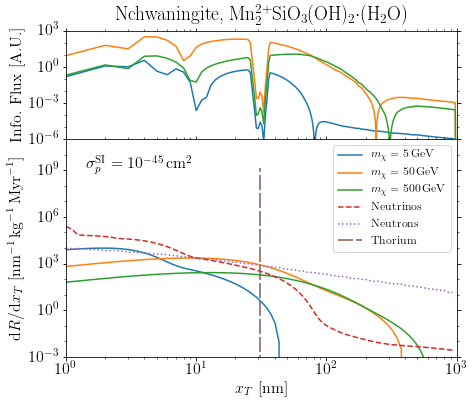

In [43]:
PlotSpectrumAndIF(Nchw, 1.0, 1.0, SF_Nchw_1nm, IF_Nchw, title_text = r"Nchwaningite, Mn$^{2+}_2$SiO$_3$(OH)$_2$$\cdot$(H$_2$O)")

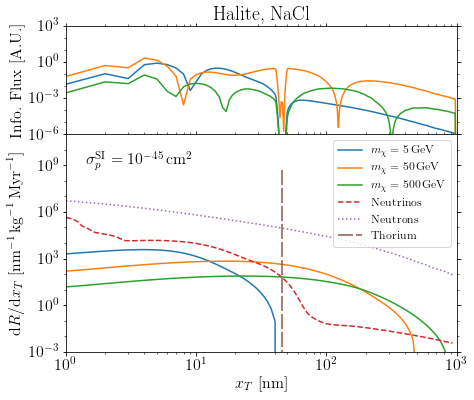

In [44]:
PlotSpectrumAndIF(Hal, 1.0, 1.0, SF_Hal_1nm, IF_Hal, title_text = r"Halite, NaCl")

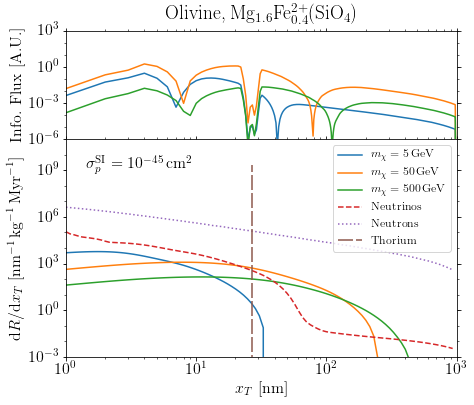

In [45]:
PlotSpectrumAndIF(Oliv, 1.0, 1.0, SF_Oliv_1nm, IF_Oliv, title_text = r"Olivine, Mg$_{1.6}$Fe$^{2+}_{0.4}$(SiO$_4$)")

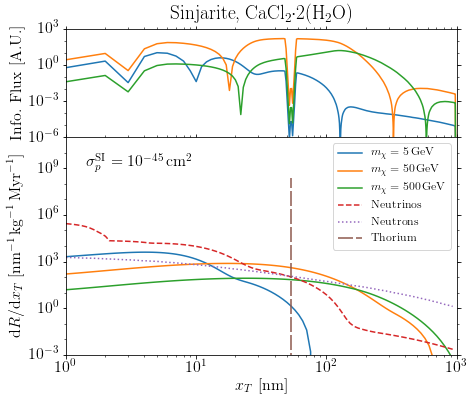

In [46]:
PlotSpectrumAndIF(Sinj, 1.0, 1.0, SF_Sinj_1nm, IF_Sinj, title_text = r"Sinjarite, CaCl$_2\cdot$2(H$_2$O)")